In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import datestr2num, num2date
import numpy as np
import math
import seaborn as sns
import os

### There has a frequent used method named PM(Prevention Maintenance) predicting method. It's used for time series dataset. And the trendency of the data should be rising or falling regularly

In [18]:
df = pd.read_csv("raw_data.csv")
df

,Unnamed: 0,date,CP1,CP2,CP3,CP4
0,0,2020/9/11 0:00,10.228580,13.349320,15.614010,10.209590
1,1,2020/9/12 0:00,10.222363,13.385078,15.611093,10.218601
2,2,2020/9/13 0:00,10.199184,13.428460,15.592099,10.133565
3,3,2020/9/14 0:00,10.257145,13.444990,15.638010,10.105852
4,4,2020/9/15 0:00,10.184685,13.401493,15.524206,9.894600
5,5,2020/9/16 0:00,10.204966,13.467512,15.592777,10.005643
6,6,2020/9/17 0:00,10.247144,13.539729,15.641622,10.107849
7,7,2020/9/18 0:00,10.227592,13.576802,15.652856,10.062528
8,8,2020/9/19 0:00,10.285985,13.600660,15.659795,9.990031
9,9,2020/9/20 0:00,10.285345,13.657163,15.750564,10.083973


In [19]:
df = df[['date', 'CP1', 'CP2', 'CP3', 'CP4']]
df

,date,CP1,CP2,CP3,CP4
0,2020/9/11 0:00,10.228580,13.349320,15.614010,10.209590
1,2020/9/12 0:00,10.222363,13.385078,15.611093,10.218601
2,2020/9/13 0:00,10.199184,13.428460,15.592099,10.133565
3,2020/9/14 0:00,10.257145,13.444990,15.638010,10.105852
4,2020/9/15 0:00,10.184685,13.401493,15.524206,9.894600
5,2020/9/16 0:00,10.204966,13.467512,15.592777,10.005643
6,2020/9/17 0:00,10.247144,13.539729,15.641622,10.107849
7,2020/9/18 0:00,10.227592,13.576802,15.652856,10.062528
8,2020/9/19 0:00,10.285985,13.600660,15.659795,9.990031
9,2020/9/20 0:00,10.285345,13.657163,15.750564,10.083973


c:\users\ysuna\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\ysuna\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\ysuna\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


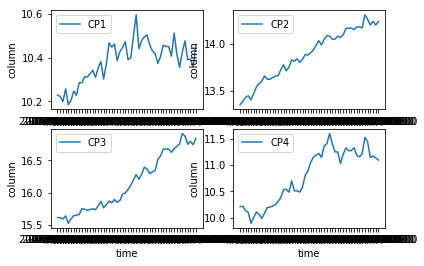

In [20]:
for i in range(4):
    cp = 'CP' + str(i+1)
    plt.subplot(221 + i)
    plt.plot(df['date'], df[cp], label=cp)
    plt.xlabel('time')
    plt.ylabel('column')
    plt.legend()
plt.show()

###  We select the CP2 and CP3 to do the testing. Because both them have a rising trendency. Without smoothing processing.

In [151]:
average_span = 100
df['Average_span_CP2'] = df['CP2'].ewm(span=average_span).mean()
df['Average_span_CP3'] = df['CP3'].ewm(span=average_span).mean()
df['Average_span_CP4'] = df['CP4'].ewm(span=average_span).mean()
df

,date,CP1,CP2,CP3,CP4,Average_span_CP2,Average_span_CP3,Average_span_CP4
0,2020/9/11 0:00,10.228580,13.349320,15.614010,10.209590,13.349320,15.614010,10.209590
1,2020/9/12 0:00,10.222363,13.385078,15.611093,10.218601,13.367378,15.612537,10.214141
2,2020/9/13 0:00,10.199184,13.428460,15.592099,10.133565,13.388147,15.605588,10.186743
3,2020/9/14 0:00,10.257145,13.444990,15.638010,10.105852,13.402787,15.613938,10.165910
4,2020/9/15 0:00,10.184685,13.401493,15.524206,9.894600,13.402518,15.595267,10.109456
5,2020/9/16 0:00,10.204966,13.467512,15.592777,10.005643,13.413899,15.594831,10.091277
6,2020/9/17 0:00,10.247144,13.539729,15.641622,10.107849,13.432971,15.601923,10.093789
7,2020/9/18 0:00,10.227592,13.576802,15.652856,10.062528,13.452233,15.608744,10.089602
8,2020/9/19 0:00,10.285985,13.600660,15.659795,9.990031,13.470075,15.614881,10.077633
9,2020/9/20 0:00,10.285345,13.657163,15.750564,10.083973,13.490512,15.629702,10.078326


###  Then we try to use IGD(InverseGaussianDistribution) to predict when there has a big probability which the current value will reach threshold

In [152]:
def iGpdf(x, mu, sig, L):
    return L / np.sqrt(2 * np.pi * x ** 3) * np.exp(-(L - x * mu) ** 2 / (2 * sig ** 2 * x))

def calculate_EOL(cal_object, day_future, threshold):
    minValue_index = np.argmin(cal_object)
    value_min = min(np.array(cal_object))
    increment_period = np.array(cal_object)[minValue_index:]
    increment = np.diff(increment_period)
    trend = np.mean(increment)
    deviation = np.std(increment)
    return iGpdf(day_future, trend, deviation, threshold-increment_period[-1])

### Split training set and Set threshold

In [153]:
## training data set: df[:40]
training_ratio = 40
## select a threshold in the df[40:]
threshold_setting = 49

In [154]:
## the future day range is within 30 days.
day_future_range = np.arange(1, 30)
day_future_timestamp = datestr2num(df['date'][training_ratio]) + day_future_range -1
day_future = [num2date(d).strftime('%Y/%m/%d %H:%M') for d in day_future_timestamp]
items_threshold = {
    'CP2': df['Average_span_CP2'][threshold_setting],
    'CP3': df['Average_span_CP3'][threshold_setting],
    'CP4': df['Average_span_CP4'][threshold_setting]
}

### Just to predict when it will reach that threshold in each item 

In [155]:
results = {'CP2':[], 'CP3':[]}
for item, threshold in items_threshold.items():
    EOL_density_EWM = calculate_EOL(df['Average_span_'+item][:training_ratio], day_future_range, threshold)
    results[item] = EOL_density_EWM
    print("{}'s real time for threshold: {}".format(item, df['date'][threshold_setting]))
    print("Predicted reaching time for {}: {}".format(item, day_future[np.argmax(results[item])]))

CP2's real time for threshold: 2020/10/30 0:00
Predicted reaching time for CP2: 2020/10/28 00:00
CP3's real time for threshold: 2020/10/30 0:00
Predicted reaching time for CP3: 2020/11/05 00:00
CP4's real time for threshold: 2020/10/30 0:00
Predicted reaching time for CP4: 2020/10/26 00:00


### There has six days deviation in CP3 case. 
### As for irregular rising data, the deviation with this method will be larger. 

### Take a look at image ot result.

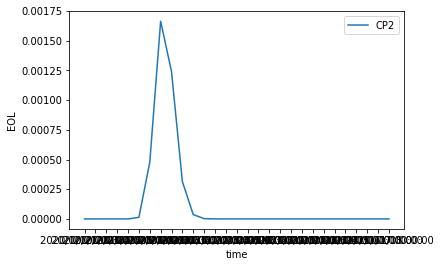

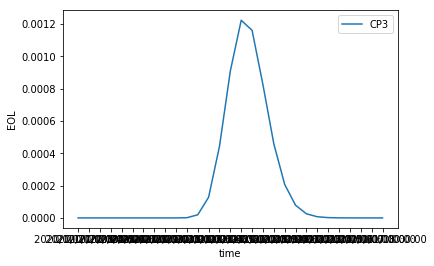

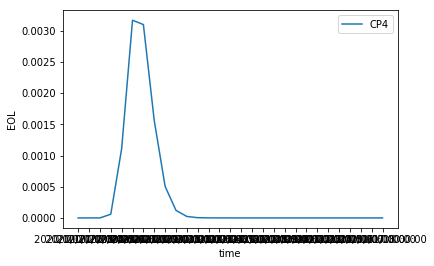

In [156]:
## CP2
plt.plot(day_future, results['CP2'], label='CP2')
plt.xlabel('time')
plt.ylabel('EOL')
plt.legend()
plt.show()
## CP2
plt.plot(day_future, results['CP3'], label='CP3')
plt.xlabel('time')
plt.ylabel('EOL')
plt.legend()
plt.show()
## CP2
plt.plot(day_future, results['CP4'], label='CP4')
plt.xlabel('time')
plt.ylabel('EOL')
plt.legend()
plt.show()

### As the picture shown, the topmost point's corresponding time is threshold arrival time